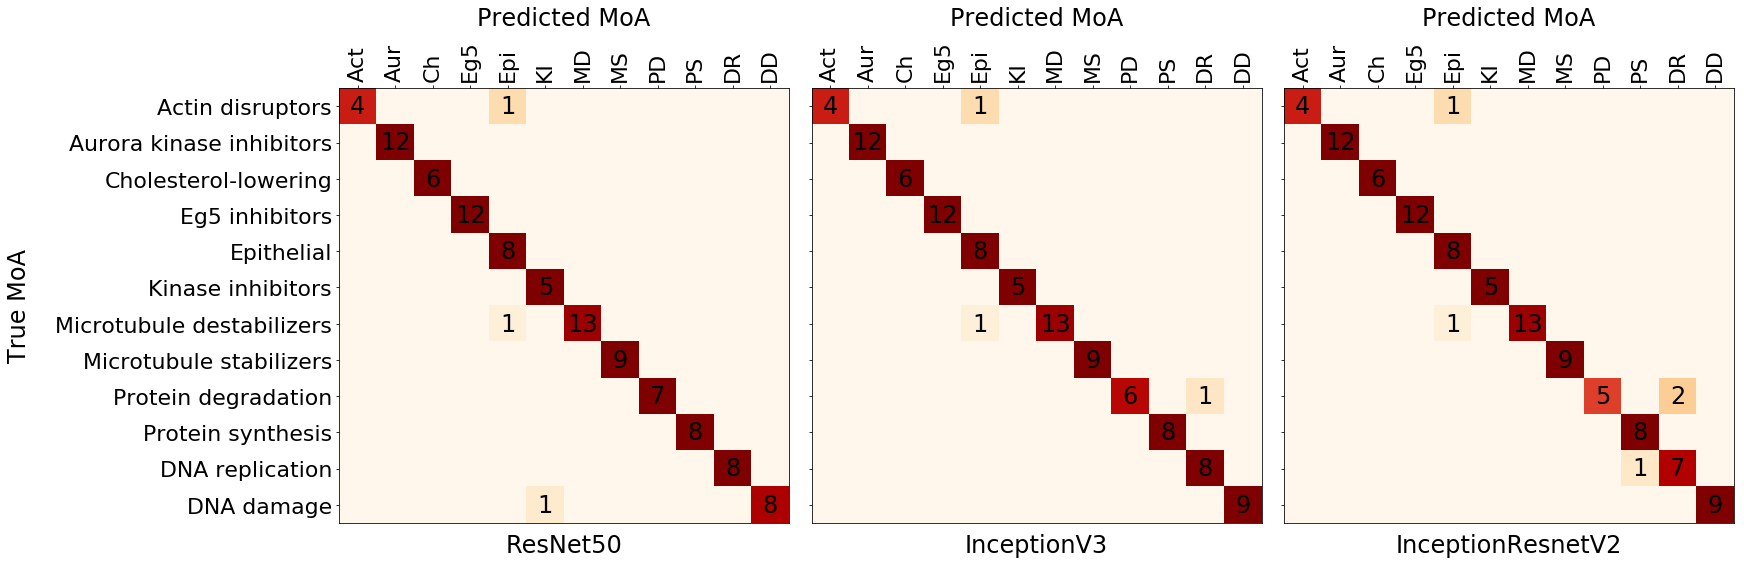

In [1]:
import matplotlib.pyplot as plt
import numpy as np

pivot = [np.array([[4 ,0,0,0,1,0,0,0,0,0,0,0],
                  [0,12,0,0,0,0,0,0,0,0,0,0],
                  [0 ,0,6,0,0,0,0,0,0,0,0,0],
                  [0,0,0,12,0,0,0,0,0,0,0,0],
                  [0 ,0,0,0,8,0,0,0,0,0,0,0],
                  [0 ,0,0,0,0,5,0,0,0,0,0,0],
                  [0,0,0,0,1,0,13,0,0,0,0,0],
                  [0,0,0,0,0,0,0 ,9,0,0,0,0],
                  [0,0,0,0,0,0,0 ,0,7,0,0,0],
                  [0,0,0,0,0,0,0 ,0,0,8,0,0],
                  [0,0,0,0,0,0,0 ,0,0,0,8,0],
                  [0,0,0,0,0,1,0 ,0,0,0,0,8]]),
         np.array([[4 ,0,0,0,1,0,0,0,0,0,0,0],
                  [0,12,0,0,0,0,0,0,0,0,0,0],
                  [0 ,0,6,0,0,0,0,0,0,0,0,0],
                  [0,0,0,12,0,0,0,0,0,0,0,0],
                  [0 ,0,0,0,8,0,0,0,0,0,0,0],
                  [0 ,0,0,0,0,5,0,0,0,0,0,0],
                  [0,0,0,0,1,0,13,0,0,0,0,0],
                  [0,0,0,0,0,0,0 ,9,0,0,0,0],
                  [0,0,0,0,0,0,0 ,0,6,0,1,0],
                  [0,0,0,0,0,0,0 ,0,0,8,0,0],
                  [0,0,0,0,0,0,0 ,0,0,0,8,0],
                  [0,0,0,0,0,0,0 ,0,0,0,0,9]]),
         np.array([[4 ,0,0,0,1,0,0,0,0,0,0,0],
                  [0,12,0,0,0,0,0,0,0,0,0,0],
                  [0 ,0,6,0,0,0,0,0,0,0,0,0],
                  [0,0,0,12,0,0,0,0,0,0,0,0],
                  [0 ,0,0,0,8,0,0,0,0,0,0,0],
                  [0 ,0,0,0,0,5,0,0,0,0,0,0],
                  [0,0,0,0,1,0,13,0,0,0,0,0],
                  [0,0,0,0,0,0,0 ,9,0,0,0,0],
                  [0,0,0,0,0,0,0 ,0,5,0,2,0],
                  [0,0,0,0,0,0,0 ,0,0,8,0,0],
                  [0,0,0,0,0,0,0 ,0,0,1,7,0],
                  [0,0,0,0,0,0,0 ,0,0,0,0,9]])]

fig, axes = plt.subplots(1,3,figsize=(25,8),sharey=True);
#cmap = plt.cm.gist_heat
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
model_types=['ResNet50', 'InceptionV3', 'InceptionResnetV2']
for i, ax in enumerate(axes):
    pivot_norm = pivot[i].astype(float) / pivot[i].sum(axis=1)[:,None]
    #ax = sns.heatmap(pivot,annot=True, square=True)
    ax.pcolor(pivot_norm, cmap=plt.cm.OrRd) 

    for y in range(pivot[i].shape[0]):
        for x in range(pivot[i].shape[1]):
            if pivot[i][y, x] > 0:
                ax.text(x + 0.5, y + 0.5, '%.0f' % pivot[i][y, x],
                         horizontalalignment='center',
                         verticalalignment='center',
                         fontsize=24)

    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 1))
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xlabel('Predicted MoA', fontsize=24, labelpad=14)
    ax.xaxis.set_label_position("top")
    if i == 0:
        ax.set_ylabel('True MoA', fontsize=24, labelpad=24)
    ax.set_xticks(np.arange(pivot[i].shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(pivot[i].shape[0]) + 0.5, minor=False)
    ax.xaxis.set_tick_params(labelsize=22)
    ax.yaxis.set_tick_params(labelsize=22)

    ax.set_xticklabels(['Act', 'Aur', 'Ch', 
                        'Eg5'  , 'Epi', 'KI'   ,
                        'MD', 'MS', 'PD', 
                        'PS', 'DR', 'DD'])
    ax.set_yticklabels(['Actin disruptors', 'Aurora kinase inhibitors', 'Cholesterol-lowering', 
                        'Eg5 inhibitors'  , 'Epithelial'              , 'Kinase inhibitors'   ,
                        'Microtubule destabilizers', 'Microtubule stabilizers', 'Protein degradation', 
                        'Protein synthesis', 'DNA replication', 'DNA damage'])

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.text(6, 12.6, model_types[i],
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=24)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show();
fig.savefig("CNN_confusion_matrices.pdf", bbox_inches='tight');